In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [340]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [10]:
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
# df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_phe = thermo_df(df_phe)
df_phe.shape
plotly_zone(df_phe)

In [ ]:
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

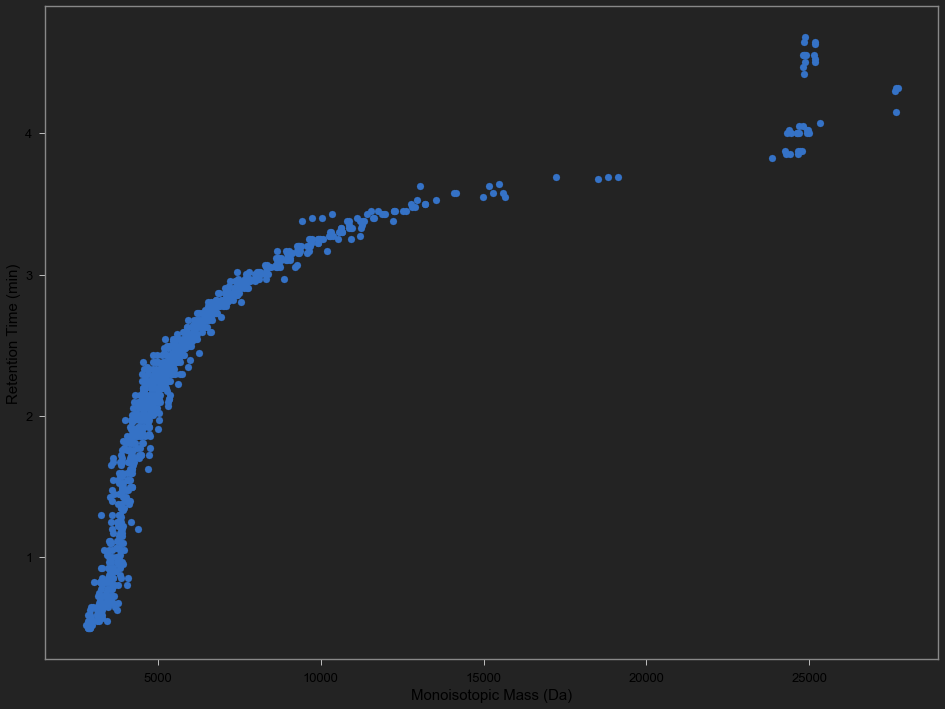

In [11]:
df_noad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligossample1.xlsx')
df_noad = thermo_df(df_noad)
df_noad.shape
plot_zone(df_noad)

In [12]:
df_noad_25k = df_noad[(df_noad.Mass > 20000)]
plotly_zone(df_noad_25k)

In [13]:
bcr = base_calling_random(df_noad_25k, silence=True)
plotly_basecalling_vol(*bcr)

In [279]:
df_phe_25k = df_phe[(df_phe.Mass > 24000) & (df_phe.Mass < 26000) & (df_phe.Vol > 1E5)]
# df_phe_25k = df_phe[(df_phe.Mass > 23900) & (df_phe.Mass < 24000)]
# df_phe_25k = df_phe[df_phe.Mass > 23000]
px.scatter(x=df_phe_25k.Mass, y=df_phe_25k.Vol)

In [15]:
df_phe[(df_phe.Mass > 24000) & (df_phe.Vol > 500000)].sort_values('Mass')

,Mass,RT,Vol
5819,24027.244899,16.049153,3460015.41
5822,24087.242612,15.979698,5613045.73
5823,24103.269316,16.014392,663682.65
5826,24116.267377,16.014392,765149.31
5827,24118.269649,15.910278,936483.79
5831,24238.334749,15.945038,511799.89
5832,24239.264263,16.014392,829557.81
5833,24252.311092,15.979698,67449456.40
5834,24267.306460,15.910278,4921316.68
5835,24268.303777,16.014392,5195981.25


In [16]:
df_phe[(df_phe.Mass > 24600) & (df_phe.Mass < 25500) & (df_phe.Vol > 100000)].sort_values('Mass')

,Mass,RT,Vol
5864,24610.422671,15.979698,1098320.58
5866,24624.386609,16.049153,375992.85
5867,24639.349521,16.089090,447562.92
5871,24653.350177,16.119294,577899.68
5879,24939.534077,16.510205,389412.29
5886,25005.518339,16.573470,1016557.68
5899,25334.568757,16.610561,3153675.69
5902,25351.548079,16.610561,100786.68
5908,25392.510774,16.648194,200619.62


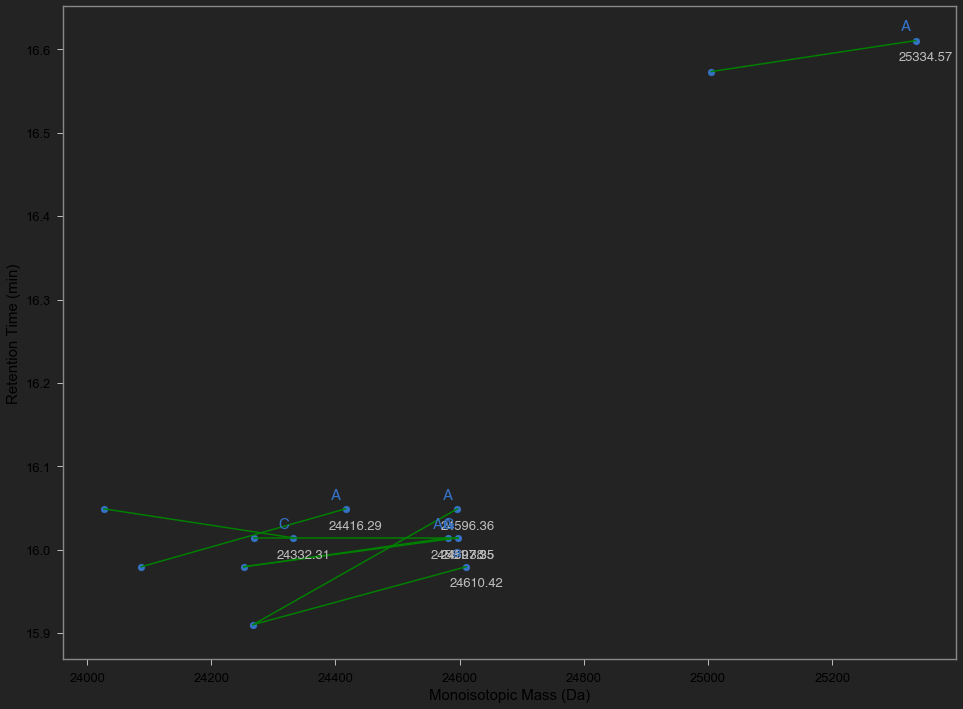

In [250]:
bcr = base_calling_random(df_phe_25k, silence=True)
plt, _ = plot_basecalling(*bcr)
plt.savefig('/Users/bryan/Documents/Presentations/Feb 17 2021/25k_bc.png', transparent=True)

In [18]:
plotly_basecalling(*bcr)

In [19]:
df_5p = pd.read_excel('/Users/bryan/Downloads/phe5p.xlsx')
df_3p = pd.read_excel('/Users/bryan/Downloads/phe3p.xlsx')
df_5p.shape, df_3p.shape

((3660, 4), (2192, 4))

In [20]:
df_5p = df_5p[df_5p.Vol > 1E5]
df_3p = df_3p[df_3p.Vol > 1E5]
df_5p.shape, df_3p.shape

((1592, 4), (1000, 4))

In [21]:
full_mass = 24416.29 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24416, df_5p_24416 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24416, df_3p_24416)
df_24416 = pd.concat([df_3p_24416, df_5p_24416]).drop_duplicates()
df_24416.shape

full_mass 24416.29 sum_value 24434.3


(52, 4)

In [22]:
full_mass = 24087.24 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24087, df_5p_24087 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24087, df_3p_24087)
df_24087 = pd.concat([df_3p_24087, df_5p_24087]).drop_duplicates()
df_24087.shape

full_mass 24087.24 sum_value 24105.3


(87, 4)

In [402]:
tmp = df_3p_24087.copy()
tmp.Mass += 329.0525
plotly_zones(df_3p_24416, tmp)

In [435]:
# df_merge = pd.concat([df_3p_24445, df_5p_24116]).drop_duplicates()
full_mass = 24252.32 #24581.38 #
df_skeleton = df_3p_24252 #df_5p_24597
group = 'Group_24581'

fullmass_dot = df_phe[(df_phe.Mass>full_mass-0.1) & (df_phe.Mass<full_mass+0.1)]
df_gap_dots = find_gap_dots(df_3p, df_skeleton, fullmass_dot, orientation=3)
df_gap_dots.shape

Processing forward 1527.2702026572
components 1527.2702026572--61.95570000000001
keep this dot 1527.2702026572
238.0443 1227.2702026572 -0.0029330938701212644 0.513839812569258
Processing the gap -61.95570000000001-1527.2702026572, 67 dots
extend dots       Unnamed: 0         Mass        RT        Vol
13           26   586.115495  0.475447  136555.34
76          308   862.232682  0.475447  100641.40
133         542  1182.221868  0.404165  214851.37
Processing forward 1832.30908929826
Processing forward 2138.33336600767
components 2138.33336600767-1527.2702026572
keep this dot 2138.33336600767
1827.2702026572 1838.33336600767 0.7712291002699708 0.9845536620349674
Processing the gap 1527.2702026572-2138.33336600767, 2 dots
extend dots       Unnamed: 0         Mass        RT        Vol
284        1014  1833.304509  0.787332  104720.99
Processing forward 2238.24226960402
Processing forward 2444.35922599905
Processing forward 2544.27838623379
Processing forward 2773.41177965601
components 2

extend dots        Unnamed: 0          Mass         RT        Vol
1967        5626  16307.272472  15.104561  353713.55
1970        5629  16331.309205  15.175700  327609.53
Processing forward 17326.4344217308
Processing forward 17655.5020097021
components 17655.5020097021-16981.4007311943
keep this dot 17655.5020097021
17281.4007311943 17355.5020097021 15.155772561312157 15.368000575557836
Processing the gap 16981.4007311943-17655.5020097021, 1 dots
extend dots        Unnamed: 0          Mass         RT        Vol
2002        5661  17326.434422  15.246779  227538.22
Processing forward 18345.5771095401
components 18345.5771095401-17655.5020097021
keep this dot 18345.5771095401
17955.5020097021 18045.5771095401 15.248192287973703 15.4574059006014
Processing the gap 17655.5020097021-18345.5771095401, 2 dots
extend dots        Unnamed: 0          Mass         RT        Vol
2027        5686  18000.565184  15.347886  386233.73
Processing forward 18998.6621304847
components 18998.6621304847-18

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:60: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



(28, 4)

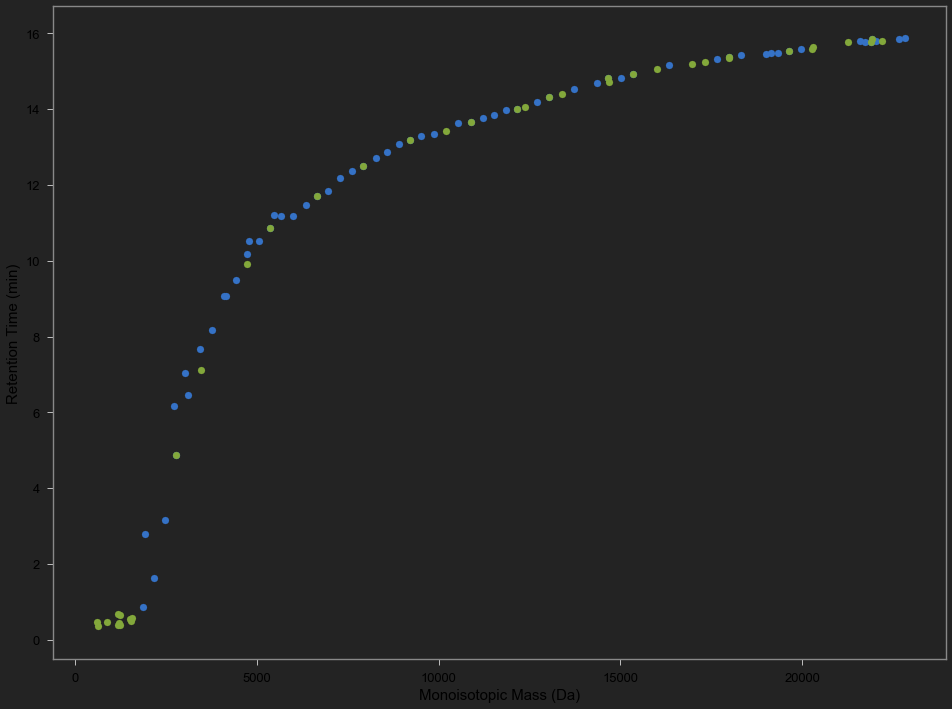

In [432]:
plotly_zones(df_skeleton, df_gap_dots)
plt = plot_zones(df_skeleton, df_gap_dots)
plt.savefig('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/II/Phe_MFE0724/{}/{}_3p.png'.format(group, int(full_mass)), transparent=True)

In [433]:
%run ../modules/cds.ipynb

In [434]:
df1 = df_skeleton.copy()
df2 = df_gap_dots.copy()

# df1['Skeleton'] = True
# df2['Skeleton'] = False
df_merge = pd.concat([df1, df2, fullmass_dot]).drop_duplicates()
df_merge['Skeleton'] = False
df_merge.loc[df1.index, 'Skeleton'] = True
df_merge.loc[fullmass_dot.index, 'Skeleton'] = True
df_merge = df_merge.sort_values('Mass')

bcr = base_calling_random(df_merge, silence=True)
df_seats = process_mass_base_seats(df_merge, bcr[1], full_mass=full_mass, orientation=3)
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/II/Phe_MFE0724/{}/seats_{}_3p.xlsx'.format(group, int(full_mass)))
df_merge.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/II/Phe_MFE0724/{}/{}_3p.xlsx'.format(group, int(full_mass)))

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




position 76, seats 76
position 76, seats 76
position 75, seats 76
position 74, seats 76
position 74, seats 76
position 74, seats 76
position 74, seats 76
position 74, seats 76
position 73, seats 76
position 73, seats 76
position 73, seats 76
position 72, seats 76
position 71, seats 76
position 71, seats 76
position 70, seats 76
position 69, seats 76
position 69, seats 76
position 68, seats 76
position 68, seats 76
position 67, seats 76
position 67, seats 76
position 66, seats 76
position 65, seats 76
position 65, seats 76
position 64, seats 76
position 63, seats 76
position 63, seats 76
position 63, seats 76
position 62, seats 76
position 61, seats 76
position 60, seats 76
position 60, seats 76
position 59, seats 76
position 58, seats 76
position 57, seats 76
position 56, seats 76
position 55, seats 76
position 54, seats 76
position 53, seats 76
position 52, seats 76
position 51, seats 76
position 50, seats 76
position 49, seats 76
position 48, seats 76
position 47, seats 76
position 4

In [422]:
def find_gap_dots(df, df_skeleton, fullmass_dot, orientation=5):
    TAG_5P = 79.9663
    TAG_3OH = 18.0106

    df_skeleton = df_skeleton.sort_values('Mass')

    idxs = list()
    gap_idxs = list()
    for idx, row in df_skeleton.iterrows():
        print('Processing forward {}'.format(row.Mass))
        columns = ['Mass', 'RT', 'Vol']
        df_ends = pd.DataFrame(index=[0, 1], columns=columns)
        if not idxs:
            # handle gap between TAG and the first dot
            if orientation == 3:
                pre = TAG_3OH - TAG_5P
            else:
                pre = TAG_5P + TAG_3OH
            df_ends.iloc[0] = [pre, 0.001, 0]
        else:
            pre = df_skeleton.loc[idxs[-1]].Mass
            df_ends.iloc[0] = df_skeleton.loc[idxs[-1]][columns]
        is_last = True if idx == df_skeleton.index[-1] else False
        if not is_last and row.Mass - pre < 600:
            continue
        if row.Mass - pre > 10000:
            idxs.append(idx)
            continue
        print('components {}-{}'.format(row.Mass, pre))
        res = components(row.Mass - pre)
        if not res.empty:
            # keep this dot, and fill in the gap
            print('keep this dot {}'.format(row.Mass))
            idxs.append(idx)
    #         continue
            df_ends.iloc[1] = row[columns]
    #         print(df_ends, df_ends.info())
            df_ends = df_ends.astype(float)
            df_alones = standalone_dots(df, df_ends, mode='all')
            if not df_alones.empty:
                print('extend dots ', df_alones)
                gap_idxs.extend(df_alones.index)
    #         print(df_alones)

        if is_last:
            df_ends.iloc[0] = df_skeleton.loc[idxs[-1]][columns]
            df_ends.iloc[1] = fullmass_dot.iloc[0][columns]
            if orientation == 5:
                df_ends.iloc[1]['Mass'] += TAG_5P
#             df_alones = standalone_dots(df_5p, df_ends, mode='all')
            df_alones = standalone_dots(df, df_ends, mode='all')
            if not df_alones.empty:
                print('extend dots ', df_alones)
                gap_idxs.extend(df_alones.index)

            # append the fullmass dot
            gap_idxs.append(fullmass_dot.index[0])

    print(gap_idxs)
    return df.loc[gap_idxs]

def find_gap_dots2(df, df_skeleton):
    TAG_5P = 79.9663
    TAG_3OH = 18.0106

    df_skeleton = df_skeleton.sort_values('Mass')
    idxs = list()
    gap_idxs = list()
    for idx, row in df_skeleton.iterrows():
        print('Processing {}'.format(row.Mass))
        columns = ['Mass', 'RT', 'Vol']
        df_ends = pd.DataFrame(index=[0, 1], columns=columns)
        if not idxs:
            # handle gap between TAG and the first dot
            pre = TAG_5P + TAG_3OH
            df_ends.iloc[0] = [pre, 0.001, 0]
    #         df_ends.iloc[0]['Mass'] = pre
    #         df_ends.iloc[0]['RT'] = 0
    #         df_ends.iloc[0]['Vol'] = 0
        else:
            pre = df_skeleton.loc[idxs[-1]].Mass
            df_ends.iloc[0] = df_skeleton.loc[idxs[-1]][columns]
        res = components(row.Mass - pre)
        if not res.empty:
            # keep this dot, and fill in the gap
            idxs.append(idx)

            df_ends.iloc[1] = row[columns]
            print(df_ends, df_ends.info())
            df_ends = df_ends.astype(float)
            df_alones = standalone_dots(df, df_ends)
            print(df_alones)
            gap_idxs.extend(list(df_alones.index))
    
    return df.loc[gap_idxs]

In [420]:
full_mass = 24581.374101 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24581, df_5p_24581 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24581, df_3p_24581)
df_24581 = pd.concat([df_3p_24581, df_5p_24581]).drop_duplicates()
df_24581.shape

full_mass 24581.374101 sum_value 24599.4


(115, 4)

In [421]:
full_mass = 24252.31 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24252, df_5p_24252 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24252, df_3p_24252)
df_24252 = pd.concat([df_3p_24252, df_5p_24252]).drop_duplicates()
df_24252.shape

full_mass 24252.31 sum_value 24270.3


(110, 4)

In [25]:
full_mass = 24596.36  #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24596, df_5p_24596 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24596, df_3p_24596)
df_24596 = pd.concat([df_3p_24596, df_5p_24596]).drop_duplicates()
df_24596.shape

full_mass 24596.36 sum_value 24614.4


(40, 4)

In [212]:
full_mass = 24267.31  #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24267, df_5p_24267 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24267, df_3p_24267)
df_24267 = pd.concat([df_3p_24267, df_5p_24267]).drop_duplicates()
df_24267.shape

full_mass 24267.31 sum_value 24285.3


(10, 4)

In [210]:
df_tmp = df_3p_24267.copy()
df_tmp.Mass += 329.0525
plotly_zones(df_3p_24596, df_tmp)

In [28]:
full_mass = 24597.35  #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24597, df_5p_24597 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24597, df_3p_24597)
df_24597 = pd.concat([df_3p_24597, df_5p_24597]).drop_duplicates()
df_24597.shape

full_mass 24597.35 sum_value 24615.4


(83, 4)

In [30]:
full_mass = 24268.3  #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24268, df_5p_24268 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zone(df_3p_24268)
plotly_zone(df_5p_24268)
plotly_zones(df_3p_24268, df_5p_24268)
df_24268 = pd.concat([df_3p_24268, df_5p_24268]).drop_duplicates()
df_24268.shape

full_mass 24268.3 sum_value 24286.3


(51, 4)

In [397]:
full_mass = 25334.57 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_25334, df_5p_25334 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True, error=0.15)
plotly_zone(df_3p_25334)
df_25334 = pd.concat([df_3p_25334, df_5p_25334]).drop_duplicates()
df_25334.shape

full_mass 25334.57 sum_value 25352.6


(30, 4)

In [32]:
full_mass = 25005.52 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_25005, df_5p_25005 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True, error=0.15)
plotly_zones(df_5p_25005, df_3p_25005)
df_25005 = pd.concat([df_3p_25005, df_5p_25005]).drop_duplicates()
df_25005.shape

full_mass 25005.52 sum_value 25023.5


(40, 4)

In [399]:
tmp = df_3p_25005.copy()
tmp.Mass += 329.0524
plotly_zones(tmp, df_3p_25334)

In [33]:
# plotly_zones(df_5p_25005, df_5p_25334)
df_common = df_5p_25005[df_5p_25005.Mass.isin(df_5p_25334.Mass)]
plotly_multi_zones([df_5p_25005, df_5p_25334, df_common])

In [78]:
full_mass = 24332.31#24661.36 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24332, df_5p_24332 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24332, df_3p_24332)
df_24332 = pd.concat([df_3p_24332, df_5p_24332]).drop_duplicates()
df_24332.shape

full_mass 24332.31 sum_value 24350.3


(59, 4)

In [79]:
full_mass = 24027.24#24661.36 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24027, df_5p_24027 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24027, df_3p_24027)
df_24027 = pd.concat([df_3p_24027, df_5p_24027]).drop_duplicates()
df_24027.shape

full_mass 24027.24 sum_value 24045.3


(56, 4)

In [36]:
df_common = df_5p_24332[df_5p_24332.Mass.isin(df_5p_24027.Mass)]
# plotly_multi_zones([df_5p_24332, df_5p_24027, df_common])
plotly_zone(df_common)

In [381]:
full_mass = 24445.35 #24116.27 ##24661.36 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24445, df_5p_24445 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24445, df_3p_24445)
df_24445 = pd.concat([df_3p_24445, df_5p_24445]).drop_duplicates()
df_24445.shape

full_mass 24445.35 sum_value 24463.4


(34, 4)

In [382]:
full_mass = 24116.27 # ##24661.36 #24189.23 #24245.225 #24941.525 #24252.315242 #24581.374101 
df_3p_24116, df_5p_24116 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_24116, df_3p_24116)
df_24116 = pd.concat([df_3p_24116, df_5p_24116]).drop_duplicates()
df_24116.shape

full_mass 24116.27 sum_value 24134.3


(38, 4)

In [419]:
full_mass = 24668.41 #24997.46 #23722.165
df_3p_no, df_5p_no = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plotly_zones(df_5p_no, df_3p_no)
df_no = pd.concat([df_3p_no, df_5p_no]).drop_duplicates()
df_no.shape

full_mass 24668.41 sum_value 24686.4


(30, 4)

In [467]:
df_merge = pd.concat([df_5p_24332, df_5p_24027]).drop_duplicates()
bcr = base_calling_random(df_merge, silence=True)
plotly_basecalling(*bcr)
df_seats = process_mass_base_seats(df_merge, bcr[1], full_mass=24332.31)
df_seats.shape
df_seats.to_excel('/Users/bryan/Documents/Presentations/Feb 3 2021/seats.xlsx')

In [148]:
df_3p.shape

(1000, 4)

In [211]:
# plotly_zones(df_3p_24581, df_3p_24252)
# df_tmp = df_3p_24252.copy()
# df_tmp.Mass = df_tmp.Mass + 329.0525
# plotly_zones(df_3p_24581, df_tmp)

# plotly_zones(df_5p_24416, df_5p_24087)
# plotly_zones(df_5p_24581, df_5p_24416)
# plotly_zones(df_5p_24252, df_5p_24087)
# plotly_zones(df_24252, df_24087)
# plotly_zones(df_3p_24581, df_3p_24416)

# plotly_zones(df_3p_24252, df_3p_24087)
# df_tmp = df_3p_24087.copy()
# df_tmp.Mass = df_tmp.Mass + 165.07
# plotly_zones(df_3p_24252, df_tmp)

# # plotly_zones(df_3p_24581, df_3p_24597)
# df_tmp = df_3p_24597.copy()
# # df_tmp.Mass = df_tmp.Mass - 16
# plotly_zones(df_3p_24581, df_tmp)

# plotly_zones(df_5p_24581, df_5p_24252, y='RT')
# plotly_zones(df_5p_24332, df_5p_24027, y='RT')
# plotly_zone(df_3p_24332)
# plotly_zone(df_3p_24027)
plotly_zone(df_3p_24596)
plotly_zone(df_3p_24267)

# plotly_zones(df_3p_24252, df_3p_24268)
# plotly_zones(df_3p_24581, df_3p_24597)
# plotly_zones(df_24252, df_24268)
# plotly_zones(df_24252, df_24597)
# plotly_multi_zones([df_5p_24581, df_24597, df_24252, df_24268])

In [269]:
df_left_gap = dots_in_left_gap(df_5p, 2826.404, orientation=5)
df_left_gap.shape

397.9769 2526.40441084987 0.7796498939812057 7.220553341533761
Processing the gap 97.9769-2826.40441084987, 262 dots


(65, 4)

In [265]:
# df_mid_gap = dots_in_mid_gap(df_5p, 2548.3381, 3856.531)
df_mid_gap = dots_in_mid_gap(df_5p, 9535.374254, 14310.00116)
df_mid_gap.shape

9835.37425407517 14010.0011602149 14.026777806584542 15.172239723236858
Processing the gap 9535.37425407517-14310.0011602149, 77 dots


(65, 4)

In [226]:
# df_right_gap = dots_in_right_gap(df_phe, 20449.84227, 24267.31, orientation=3)
df_right_gap = dots_in_right_gap(df_phe, 21150.87924, 24596.36, orientation=5)
df_right_gap.shape

21450.8792409211 24376.3229028188 15.726071052930893 16.128403600011097
Processing the gap 21150.8792409211-24676.3229028188, 48 dots


(12, 3)

In [95]:
%run ../modules/utils.ipynb
components(674.1275284)

Name,A,C,G,U,D,y,Methyl,Mass,MassDiff
18,1,0,1,0,0,0,0,674.0999,0.027628


In [261]:

# plotly_multi_zones([df_3p_24332, df_mid_gap])
# plotly_multi_zones([df_3p_24027, df_mid_gap])
df_3p_tmp = df_3p_24332.copy()
df_3p_tmp.Mass = df_3p_tmp.Mass - 305.0413
# plotly_multi_zones([df_3p_24332, df_3p_tmp])

df_common = match_dfs(df_3p_tmp, df_3p_24027)
# plotly_zone(df_common)
# plotly_multi_zones([df_3p_24027, df_left_gap[df_left_gap.Hit > 3]])
# plotly_multi_zones([df_3p_24027, df_mid_gap, df_left_gap])
# plotly_multi_zones([df_3p_24267, df_mid_gap, df_left_gap, df_right_gap])
plotly_multi_zones([df_5p_25334,  df_mid_gap,])
# df_3p_tmp = df_3p_24252.copy()
# df_3p_tmp.Mass = df_3p_tmp.Mass + 329.0525
# plotly_multi_zones([df_3p_24581, df_3p_tmp])

# plotly_multi_zones([df_5p_24332, df_mid_gap, df_right_gap])
# plotly_multi_zones([df_5p_24416, df_5p_24087, df_left_gap])

In [199]:
df_left_gap = mutual_connection(df_left_gap)

Processing 1001.16453386161
--handle Mass 1631.19893906058
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2256.32669962534
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
271   0  1  0  1  2  0       2  1255.1798 -0.017634
Hit index 0.
Processing 1127.17813970876
--handle Mass 2363.33921934114
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
181   0  2  0  2  0  0       1  1236.1488   0.01228
262   0  0  2  1  0  1       2  1236.1619  -0.00082
Hit index 1.
--handle Mass 1849.28819127265
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 1153.11094315612
--handle Mass 2490.41723568105
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
339   2  0  1  1  0  0       2  1337.2089  0.097393
422   3  0  0  0  1  0       3  1337.2453  0.060993
Hit index 2.
--handle Mass 2138.33336600767
Name  A  C  G  U  D  y  Methyl      Mass  MassDiff
113   0  0  1  2  0  0       2  985.1292  0.093223
Hit index 2.
Proc

--handle Mass 1876.2722457474
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2914.4181423274
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
19    0  0  0  4  1  0       0  1532.1422  0.070095
97    0  2  0  1  2  0       0  1532.1899  0.022395
284   0  0  2  0  2  1       1  1532.2030  0.009295
713   3  1  0  0  0  1       2  1532.2406 -0.028305
Hit index 13.
Processing 1388.19191204142
--handle Mass 2632.37136510312
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
104   1  3  0  0  0  0       0  1244.1764  0.003053
129   0  0  0  1  3  0       1  1244.1639  0.015553
Hit index 14.
--handle Mass 2238.24226960402
Name  A  C  G  U  D  y  Methyl      Mass  MassDiff
125   0  2  0  0  0  1       2  850.1244 -0.074042
Hit index 14.
--handle Mass 1796.23543663082
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2660.34913678144
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
109   2  0  0  1  1 

--handle Mass 1265.13845861592
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 1741.26804612621
--handle Mass 2401.35254452698
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2161.36146206579
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1241.12441950189
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2648.37769812018
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2339.30956787156
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 1793.28757491678
--handle Mass 1229.17684588346
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2585.38032005069
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2489.36724619838
Empty DataFrame
Columns: [A, C, G, U, D, 

Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2466.34099214518
Name  A  C  G  U  D  y  Methyl      Mass  MassDiff
33    1  0  0  0  0  1       1  555.0787 -0.020973
Hit index 40.
Processing 1927.27533826164
--handle Mass 1242.11298214479
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1305.19114452408
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2688.3847252979
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2795.39067904363
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1184.15368436219
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 1931.22579159016
--handle Mass 2684.36091099691
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1241.12441950189
Name  A  C  G  U  D  y  Methyl     

Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2660.34913678144
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1127.17813970876
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1727.2530306889
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 2226.26023655716
--handle Mass 1794.27243983376
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2660.34913678144
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1606.24101439997
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2967.4014677975
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2965.39324024553
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 2233.29924992

Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1127.17813970876
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
138   0  0  1  0  2  1       1  1187.1556  -0.01758
Hit index 68.
--handle Mass 1796.23543663082
Name  A  C  G  U  D  y  Methyl      Mass  MassDiff
3     0  0  0  1  0  1       0  518.0359  0.044823
Hit index 68.
--handle Mass 1307.19809309309
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
140   1  1  1  0  0  0       2  1007.1724 -0.054333
Hit index 68.
Processing 2338.32368700828
--handle Mass 2795.39067904363
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1229.17684588346
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1591.19144434415
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2967.4014677975
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 

Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1184.15368436219
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
139   0  0  1  0  3  0       1  1283.1860   0.04663
238   2  1  0  1  0  0       1  1283.1872   0.04543
Hit index 80.
Processing 2484.36715876242
--handle Mass 1631.19893906058
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1127.17813970876
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
153   0  0  3  0  1  0       1  1357.1988 -0.009781
Hit index 81.
--handle Mass 2914.4181423274
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1265.13845861592
Name  A  C  G  U  D  y  Methyl      Mass  MassDiff
322   1  1  1  0  0  1       2  1219.183    0.0457
Hit index 81.
--handle Mass 1388.19191204142
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 2488.32165717211
--handle Mass 2930.42594743252
Empty DataFr

Name  A  C  G  U  D  y  Methyl      Mass  MassDiff
105   2  0  1  0  0  0       1  1017.168  0.010759
Hit index 93.
--handle Mass 1794.27243983376
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1153.11094315612
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
270   0  0  1  0  3  1       1  1495.1966  0.070155
465   2  1  0  1  0  1       1  1495.1978  0.068955
Hit index 93.
--handle Mass 2226.26023655716
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
Processing 2660.34913678144
--handle Mass 2238.31550323207
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1833.30450942391
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 2242.269130609
Empty DataFrame
Columns: [A, C, G, U, D, y, Methyl, Mass, MassDiff]
Index: []
--handle Mass 1184.15368436219
Name  A  C  G  U  D  y  Methyl       Mass  MassDiff
76    0  1  1  1  1  1       

In [197]:
import random

def mutual_connection(_df):
    df = _df.copy()
    df['Hit'] = 0
    len = df.shape[0]
    for i in range(len):
        print('Processing {}'.format(df.iloc[i].Mass))
        count = 0
        j_pool = set()
        N = 5 if i > 3 else 2
        while count < N:
            j = random.randint(0, len-1)
            if j == i or j in j_pool:
                continue
    #         print('i {} j {}, len {}'.format(i, j, len))
            diff = abs(df.iloc[i].Mass - df.iloc[j].Mass)
            if diff < 400 or diff > 3000:
                continue

            j_pool.add(j)

            print('--handle Mass {}'.format(df.iloc[j].Mass))
            df_condidates = components(diff)
            print(df_condidates)
            if not df_condidates.empty:
                print('Hit index {}.'.format(i))
                df['Hit'].iloc[i] += 1

            count += 1

    print(df)
    return df
    

In [266]:

df_mid_ends = pd.DataFrame()
df_mid_ends['Mass'] = np.array([9535.374254, 14310.00116])
df_mid_ends = match_dfs(df_mid_ends, df_5p)
df_tmp = pd.concat([df_mid_gap, df_mid_ends])
bcr = base_calling_random(df_tmp, silence=True)
plotly_basecalling(*bcr)

In [268]:
df_3p_24267.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Phe_MFE0724/Group_24596/skeleton.xlsx')

In [213]:
df_merge = df_3p_24267 #pd.concat([df_5p_24332, df_5p_24027]).drop_duplicates()
bcr = base_calling_random(df_merge, silence=True)
df_seats = process_mass_base_seats(df_merge, bcr[1], full_mass=24267.31)
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Phe_MFE0724/Group_24596/seats.xlsx')

In [348]:
df_left_gap = dots_in_left_gap(df_3p, 2789.406, orientation=3)
df_left_gap.shape

238.0443 2489.40610100762 0.3513972868075118 3.9389259821305487
Processing the gap -61.95570000000001-2789.40610100762, 228 dots


(47, 4)

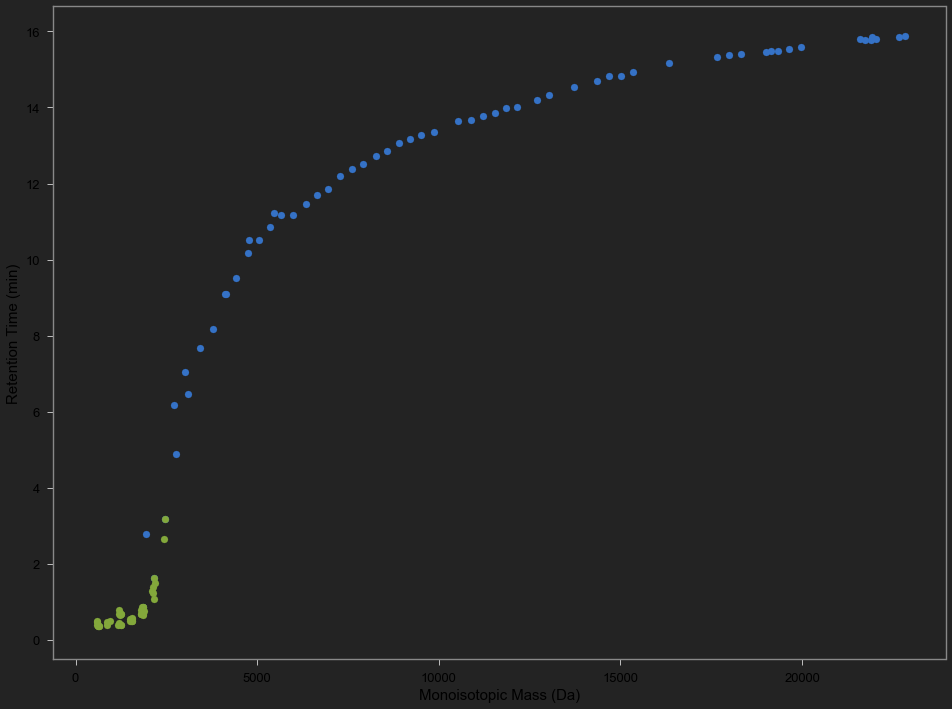

In [341]:
plot_zones(df_3p_24581, df_left_gap)
plotly_zone(df_left_gap, y='Vol')

In [389]:
%run ../modules/utils.ipynb

In [223]:
df_seats = process_mass_base_seats(df_merge, bcr[1], full_mass=24581.38)
df_seats.to_excel('/Users/bryan/Documents/Presentations/Feb 3 2021/seats.xlsx')

In [385]:
df_merge = pd.concat([df_5p_24597, df_5p_24268]).drop_duplicates()
bcr = base_calling_random(df_merge) #[df_3p_cc.Mass>20000]
plotly_basecalling(*bcr, df_ori=df_merge)

mass_x (51,) mass_y (51,)


In [349]:
TAG_5P = 79.9663
TAG_3OH = 18.0106

def dots_in_left_gap(df, mass, orientation=5):
    columns = ['Mass', 'RT']
    df_ends = pd.DataFrame(index=[0, 1], columns=columns, dtype=float)
    left_mass = TAG_5P
    if orientation == 3:
        left_mass = TAG_3OH - TAG_5P
    df_ends.loc[0][columns] = [left_mass, 0.0]
    df_ends.loc[1][columns] = df[(df.Mass < mass+0.1) & (df.Mass > mass-0.1)].iloc[0][columns]
    df_gap = standalone_dots(df, df_ends, mode='all')
    return df_gap

def dots_in_right_gap(df, mass, full_mass, orientation=5):
    columns = ['Mass', 'RT']
    df_ends = pd.DataFrame(index=[0, 1], columns=columns, dtype=float)
    df_ends.loc[0][columns] = df[(df.Mass < mass+0.1) & (df.Mass > mass-0.1)].iloc[0][columns]
    df_ends.loc[1][columns] = df[(df.Mass < full_mass+0.1) & (df.Mass > full_mass-0.1)].iloc[0][columns]
    if orientation == 5:
        df_ends.loc[1]['Mass'] += TAG_5P
    df_gap = standalone_dots(df, df_ends, mode='all')
    return df_gap

def dots_in_mid_gap(df, left_mass, right_mass):
    columns = ['Mass', 'RT']
    df_ends = pd.DataFrame(index=[0, 1], columns=columns, dtype=float)
    df_ends.loc[0][columns] = df[(df.Mass < left_mass+0.1) & (df.Mass > left_mass-0.1)].iloc[0][columns]
    df_ends.loc[1][columns] = df[(df.Mass < right_mass+0.1) & (df.Mass > right_mass-0.1)].iloc[0][columns]
    df_gap = standalone_dots(df, df_ends, mode='all')
    return df_gap

In [311]:
TAG_5P = 79.9663
TAG_3OH = 18.0106

start_mass = 20821.81608
full_mass = 24416.29
columns = ['Mass', 'RT']
df_ends = pd.DataFrame(index=[0, 1], columns=columns, dtype=float)
# df_ends.loc[0][columns] = df_5p[(df_5p.Mass < 21825.96+0.1) & (df_5p.Mass > 21825.96-0.1)].iloc[0][columns]
df_ends.loc[0][columns] = df_5p[(df_5p.Mass < start_mass+0.1) & (df_5p.Mass > start_mass-0.1)].iloc[0][columns]
df_ends.loc[1][columns] = df_5p[(df_5p.Mass < full_mass+0.1) & (df_5p.Mass > full_mass-0.1)].iloc[0][columns]
df_ends.loc[1]['Mass'] += TAG_5P
df_ends
df_alones_5p = standalone_dots(df_5p, df_ends, mode='all')
plotly_zone(df_alones_5p)

21121.8160753833 24196.2526040009 15.784928083556347 16.134552344678433
      Unnamed: 0          Mass         RT         Vol
3586        5777  21150.879241  15.805322   115385.61
3587        5778  21167.877829  15.805322   562342.12
3590        5781  21419.000701  15.805322   228847.55
3591        5782  21496.916494  15.840306   649895.16
3592        5783  21585.084318  15.805322   581348.45
3594        5785  21825.959435  15.870328   120028.95
3596        5787  21914.086381  15.840306   251138.12
3597        5788  22032.076607  15.805322   314457.20
3599        5790  22055.063389  15.805322   132143.68
3601        5792  22131.977846  15.910278   243661.73
3602        5793  22197.110771  15.805322   131613.48
3603        5794  22338.078618  15.805322   131676.02
3604        5795  22362.114792  15.840306   117671.59
3605        5797  22438.008360  15.870328   197890.64
3607        5799  22667.122618  15.870328   132472.74
3608        5800  22668.148058  15.840306   152719.38
3609      

In [179]:
df_alones_5p

,Unnamed: 0,Mass,RT,Vol
3594,5785,21825.959435,15.870328,120028.95
3601,5792,22131.977846,15.910278,243661.73
3605,5797,22438.008360,15.870328,197890.64
3609,5801,22743.064468,15.870328,264522.59
3613,5812,23722.165528,16.014392,845895.83


In [177]:
# df_alones_5p.append(df_5p[(df_5p.Mass < full_mass+0.1) & (df_5p.Mass > full_mass-0.1)].iloc[0])
# df_alones_5p
bcr = base_calling_random(df_alones_5p) #[df_3p_cc.Mass>20000]
plt, _ = plotly_basecalling(*bcr)

mass_x (5,) mass_y (5,)


TypeError: cannot unpack non-iterable NoneType object

In [280]:
tmp_mass = 283.0917 #588.133 #893.174299
df_3p[(df_3p.Mass < tmp_mass+0.1) & (df_3p.Mass > tmp_mass-0.1)]

,Unnamed: 0,Mass,RT,Vol


In [ ]:
df_alones_5p.iloc[1]['Mass'] += TAG_5P

In [281]:
columns = ['Mass', 'RT']
df_ends = pd.DataFrame(index=[0, 1], columns=columns, dtype=float)
# df_ends.loc[0][columns] = [-61.9557, 0.0]
df_ends.loc[0][columns] = [893.174299, 0.0]
df_ends.loc[1][columns] = df_24597[(df_24597.Mass < 2789.41) & (df_24597.Mass > 2789.40)].iloc[0][columns]
df_alones_3p = standalone_dots(df_3p, df_ends, mode='all')
df_alones_3p.shape

1193.174299 2489.40610100762 0.5787656336734349 3.71155763526463
     Unnamed: 0         Mass        RT         Vol
137         549  1194.149115  0.787332  1034750.30
143         569  1229.176846  0.647263   131061.92
146         575  1241.124420  0.687464   646393.92
147         576  1242.112982  0.687464   368291.01
150         585  1254.159395  0.687464   548590.41
153         591  1265.138459  0.787332  3060209.54
158         605  1281.133773  0.687464  1862415.85
160         611  1288.164416  0.998040  2182212.82
162         616  1294.164888  0.757188  3385098.62
163         621  1299.181860  0.582532   249541.61
164         622  1300.152557  0.787332   117835.67
165         630  1305.191145  0.787332   215207.87
166         632  1307.198093  0.687464   201406.51
167         636  1308.193716  0.857067   674168.58
168         637  1310.147718  0.998040   162473.11
170         640  1316.145997  0.757188   231050.12
172         643  1320.154532  0.687464  2600219.61
173         646  

(17, 4)

In [287]:
df_alones_3p

,Unnamed: 0,Mass,RT,Vol
227,797,1551.279475,0.582532,410340.52
282,1006,1817.302863,0.857067,534636.13
283,1012,1832.309089,0.687464,8386976.48
284,1014,1833.304509,0.787332,104720.99
285,1017,1836.245350,0.824983,245597.88
289,1029,1849.288191,0.647263,284052.05
291,1035,1854.290803,0.687464,783515.98
292,1038,1856.320489,0.857067,7636829.42
293,1043,1860.304941,0.857067,298612.64
295,1056,1873.300902,0.757188,266831.52


In [286]:
plotly_zone(df_alones_3p, y='Vol')

In [282]:
plotly_zones(df_24597, df_alones_3p)
# plotly_zones(df_24268, df_alones_3p)

In [165]:
bcr = base_calling_random(df_alones_3p, silence=True)
plotly_basecalling(*bcr)

In [22]:
plotly_zone(df_5p_cc)

mass_x (73,) mass_y (73,)


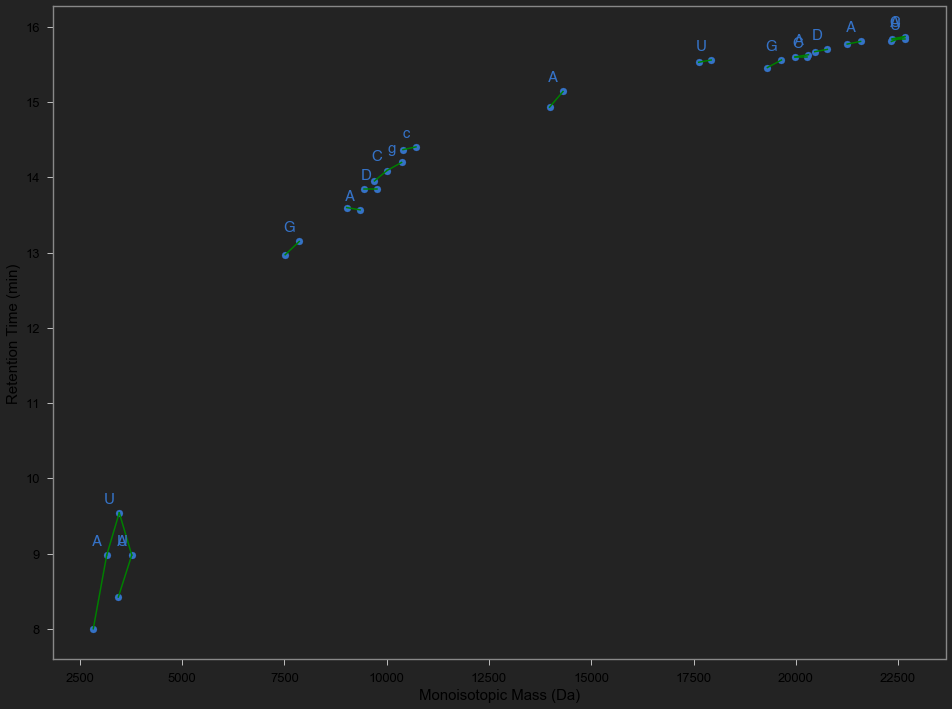

In [24]:
bcr = base_calling_random(df_5p_cc) #[df_3p_cc.Mass>20000]
plt, _ = plot_basecalling(*bcr, annotate=False)

In [28]:
fullmass_dot = df_phe[(df_phe.Mass>full_mass-0.1) & (df_phe.Mass<full_mass+0.1)]
fullmass_dot

,Mass,RT,Vol
5899,25334.568757,16.610561,3153675.69


In [29]:
TAG_5P = 79.9663
TAG_3OH = 18.0106

df_sample = df_5p_cc #df_5p_cc_ref
df_sample = df_sample.sort_values('Mass')

idxs = list()
gap_idxs = list()
for idx, row in df_sample.iterrows():
    print('Processing forward {}'.format(row.Mass))
    columns = ['Mass', 'RT', 'Vol']
    df_ends = pd.DataFrame(index=[0, 1], columns=columns)
    if not idxs:
        # handle gap between TAG and the first dot
        pre = TAG_5P + TAG_3OH
        df_ends.iloc[0] = [pre, 0.001, 0]
    else:
        pre = df_sample.loc[idxs[-1]].Mass
        df_ends.iloc[0] = df_sample.loc[idxs[-1]][columns]
    is_last = True if idx == df_sample.index[-1] else False
    if not is_last and row.Mass - pre < 600:
        continue
    print('components {}-{}'.format(row.Mass, pre))
    res = components(row.Mass - pre)
    if not res.empty:
        # keep this dot, and fill in the gap
        print('keep this dot {}'.format(row.Mass))
        idxs.append(idx)
#         continue
        df_ends.iloc[1] = row[columns]
#         print(df_ends, df_ends.info())
        df_ends = df_ends.astype(float)
        df_alones = standalone_dots(df_5p, df_ends, mode='all')
        if not df_alones.empty:
            print('extend dots ', df_alones)
            gap_idxs.extend(df_alones.index)
#         print(df_alones)

    if is_last:
        df_ends.iloc[0] = df_sample.loc[idxs[-1]][columns]
        df_ends.iloc[1] = fullmass_dot.iloc[0][columns]
        df_ends.iloc[1]['Mass'] += TAG_5P
        df_alones = standalone_dots(df_5p, df_ends, mode='all')
        if not df_alones.empty:
            print('extend dots ', df_alones)
            gap_idxs.extend(df_alones.index)
        
        # append the fullmass dot
        gap_idxs.append(fullmass_dot.index[0])
        
print(gap_idxs)
print(df_5p.loc[gap_idxs])

Processing forward 1001.16453386161
components 1001.16453386161-97.9769
Processing forward 1021.16213638855
components 1021.16213638855-97.9769
Processing forward 1043.14401537613
components 1043.14401537613-97.9769
keep this dot 1043.14401537613
397.9769 743.14401537613 0.08558078766673305 0.49795151444266705
    Unnamed: 0        Mass        RT        Vol
1            5  559.072187  0.475447   74629.97
4           13  570.140804  0.475447  130230.49
9           26  586.115495  0.475447  136555.34
18         126  706.127683  0.475447  395954.47
20         155  730.056146  0.475447  209640.40
Processing the gap 97.9769-1043.14401537613, 5 dots
No dots found in these gaps.
Processing forward 2685.3644472719
components 2685.3644472719-1043.14401537613
keep this dot 2685.3644472719
1343.14401537613 2385.3644472719 1.4930070349457063 5.203465076533744
     Unnamed: 0         Mass        RT          Vol
142         675  1348.009251  2.156695    111930.37
150         686  1358.194132  2.4011

No dots found in these gaps.
Processing forward 3767.49735506755
Processing forward 4868.65325098761
components 4868.65325098761-3626.49399720469
keep this dot 4868.65325098761
3926.49399720469 4568.65325098761 9.263287409000034 10.585838488026
      Unnamed: 0         Mass         RT          Vol
1565        2976  3929.525619   9.297530   1116420.24
1566        2978  3931.432389  10.137594    140367.38
1567        2979  3932.428313  10.031795    156997.60
1568        2982  3936.550814   9.503759    956026.66
1569        2983  3937.546816   9.645917    396651.77
1570        2985  3942.479502  10.063598    108933.26
1571        2986  3943.536228   9.715611     77818.66
1572        2987  3944.506950  10.243017    135053.35
1573        2989  3947.554439   9.540773   1828843.19
1574        2990  3950.462856   9.957950    141584.19
1575        2992  3952.549037   9.435309    691595.31
1576        2993  3953.567073   9.957950    632170.24
1577        2994  3954.461058  10.206154    344028.32

keep this dot 7486.00214491504
6817.84640270951 7186.00214491504 12.186516040999152 12.666045096216154
      Unnamed: 0         Mass         RT        Vol
2408        4278  6817.907024  12.585637   44804.49
2409        4279  6820.909983  12.340178  102084.63
2410        4281  6827.919266  12.481343  165061.96
2411        4283  6833.915537  12.617204   71052.55
2412        4284  6834.920469  12.481343   25392.71
2414        4286  6841.915659  12.585637   74180.91
2415        4287  6844.914385  12.376693  120179.72
2416        4288  6845.907525  12.481343   75588.45
2417        4289  6847.920482  12.585637   93473.88
2418        4290  6851.919303  12.512470  499444.43
2420        4292  6863.903032  12.376693   92849.71
2422        4294  6867.925759  12.617204  115154.08
2423        4295  6869.929093  12.376693   51613.14
2424        4296  6871.961890  12.444878   26071.99
2425        4297  6872.948264  12.444878   46725.60
2429        4301  6882.923229  12.653704   26734.26
2430        4

No dots found in these gaps.
Processing forward 9753.30927056343
Processing forward 10004.3389055984
Processing forward 10092.4041501259
Processing forward 10093.4141956784
Processing forward 10100.3709859211
Processing forward 10363.4411221717
components 10363.4411221717-9699.29479993728
keep this dot 10363.4411221717
9999.29479993728 10063.4411221717 13.96221080797412 14.185956972202675
      Unnamed: 0          Mass         RT        Vol
2998        5034  10004.338906  14.089393   33235.76
2999        5035  10005.331908  14.017933   94023.09
3002        5039  10035.379348  14.089393   33127.24
3003        5040  10036.404839  14.160679   16437.00
3004        5041  10039.357690  14.124911   17474.59
3005        5043  10053.408819  14.160679  580558.25
3006        5044  10059.376986  14.017933   26114.20
Processing the gap 9699.29479993728-10363.4411221717, 7 dots
No dots found in these gaps.
Processing forward 10389.3773699943
Processing forward 10396.4502105451
Processing forward 107

extend dots        Unnamed: 0          Mass         RT        Vol
3334        5494  14310.001160  15.140183  117339.80
3366        5537  14989.041270  15.104561   13121.12
3367        5538  14990.012019  15.033210   11966.34
Processing forward 16002.2464617337
Processing forward 16356.2149678785
components 16356.2149678785-15640.1482302166
Processing forward 16877.3047522498
components 16877.3047522498-15640.1482302166
keep this dot 16877.3047522498
15940.1482302166 16577.3047522498 15.046292007685636 15.410687872186376
      Unnamed: 0          Mass         RT         Vol
3413        5603  15942.147135  15.317506    23791.99
3414        5605  15998.179886  15.317506    30593.86
3415        5606  16002.246462  15.068888   633573.61
3416        5607  16004.195188  15.347886   508349.79
3417        5608  16022.208131  15.388092  2522015.81
3418        5609  16031.179266  15.347886    25806.64
3419        5610  16035.157091  15.277113    19932.96
3420        5611  16050.169033  15.388092 

No dots found in these gaps.
Processing forward 22362.1147919171
Processing forward 22667.1226180497
Processing forward 22668.1480576235
Processing forward 24118.2696489791
components 24118.2696489791-22338.0786178543
Processing forward 24309.318246897
components 24309.318246897-22338.0786178543
keep this dot 24309.318246897
22638.0786178543 24009.318246897 15.731860108671624 16.053159804779188
      Unnamed: 0          Mass         RT        Vol
3607        5799  22667.122618  15.870328  132472.74
3608        5800  22668.148058  15.840306  152719.38
3609        5801  22743.064468  15.870328  264522.59
3610        5802  22830.198360  15.870328   37057.17
3611        5803  22832.193268  15.870328  155029.72
3612        5808  23372.268540  15.910278   86034.26
3613        5812  23722.165528  16.014392  845895.83
3614        5816  23948.245493  15.979698  728915.95
3615        5817  23957.226362  15.945038   66642.26
Processing the gap 22338.0786178543-24309.318246897, 9 dots
extend dots 

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [ ]:
components(918.0750643431002)

In [30]:
df_gap_dots = df_5p.loc[gap_idxs]
df_gap_dots

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



,Unnamed: 0,Mass,RT,Vol
168,715.0,1388.156733,2.120292,38753.75
249,875.0,1659.152979,1.912509,28170.04
256,886.0,1668.222080,2.577243,113923.73
259,889.0,1670.173645,2.471453,8335.29
269,902.0,1687.138669,3.797752,97102.68
273,908.0,1694.217037,2.120292,368850.72
275,910.0,1696.200975,4.851339,110220.08
286,925.0,1706.153876,3.797752,54559.90
292,933.0,1715.155146,1.521688,71639.88
293,934.0,1715.277613,3.206115,308966.71


<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

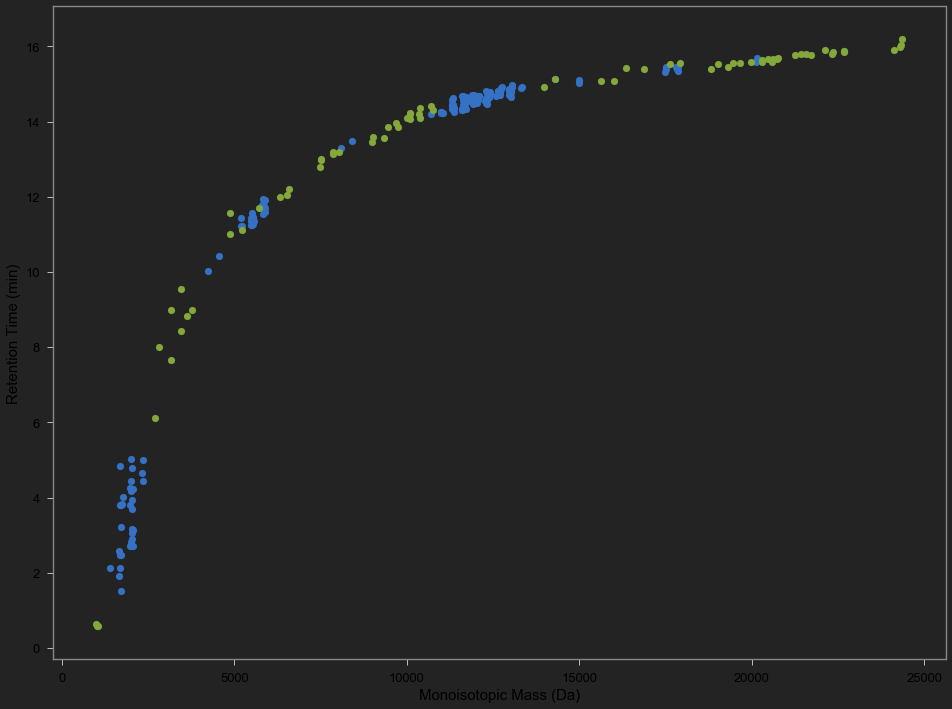

In [31]:
plot_zones(df_gap_dots, df_sample)

In [56]:
df_5p_cc.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Yue/24203.24/skeleton.xlsx')
# df_3p_cc.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Yue/24941.525/skeleton_3p.xlsx')

In [36]:
df_5p_cc.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Yue/25334.618/skeleton_5p_top.xlsx')
df_3p_cc.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Yue/25334.618/skeleton_3p_top.xlsx')

In [33]:
df_all = pd.concat([df_gap_dots, df_sample])
df_all.drop_duplicates().to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/Yue/25334.618/skeleton_with_dots_in_gap_5p.xlsx')

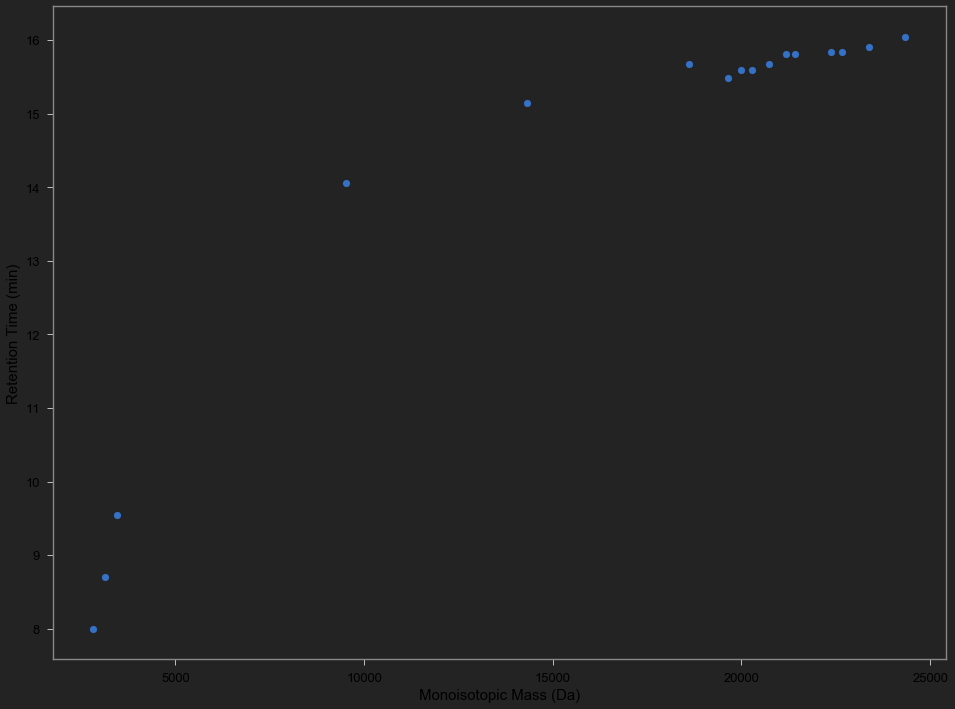

In [521]:
fpath = '/Users/bryan/Documents/Presentations/Feb 3 2021/seats_25334.csv'
df1 = pd.read_csv(fpath)
plt = plot_zone(df1)
png = fpath.split('.')[0]+'.png'
plt.savefig(png, transparent=True)